# Gradiente descendente y conjugado

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
Phi = lambda x, A, b: 0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x)

In [3]:
#Con esta función generamos una matriz definida positiva
def dpm(n):
    A = np.random.rand(n, n)
    A = np.dot(A, A.T) + np.eye(n)
    return A

### Gradiente descendente

In [4]:
def gradientDescent(A, b, x_0=None, n=10, tol=1e-10):
    X = np.zeros((n + 1, b.shape[0]))
    R = np.zeros_like(X)
    if x_0 is not None:
        X[0] = x_0
    for k in range(n):
        R[k] = b - np.dot(A, X[k])
        a_k = np.dot(R[k], R[k]) / np.dot(R[k], np.dot(A, R[k]))
        X[k+1] = X[k] + a_k * R[k]
        if np.linalg.norm(R[k]) < tol:
            X = X[:k+1]
            R = R[:k+1]
            break
    return X, R

### Gradiente conjugado

In [5]:
def conjugateGradient(A, b, x_0=None, n=None, tol=1e-10):
    if n == None:
        n = b.shape[-1]
    X = np.zeros((n + 1, b.shape[0]))
    R = np.zeros_like(X)
    D = np.zeros_like(X)
    if x_0 is not None:
        X[0] = x_0
    R[0] = b - np.dot(A, X[0])
    D[0] = R[0]
    for k in range(n):
        a_k = np.dot(D[k], R[k]) / np.dot(D[k], np.dot(A, D[k]))
        X[k+1] = X[k] + a_k * D[k]
        R[k+1] = b - np.dot(A, X[k+1])
        b_k = np.dot(D[k], np.dot(A, R[k+1])) / np.dot(D[k], np.dot(A, D[k]))
        D[k+1] = R[k+1] - b_k * D[k]
        if np.linalg.norm(R[k+1]) < tol:
            X = X[:k+2]
            R = R[:k+2]
            D = D[:k+2]
            break
    return X, R, D

In [6]:
np.random.seed(2)
n = 9 
b = np.random.rand(n)
x_0 = np.random.rand(n)
A = dpm(n)
x_exact = np.linalg.solve(A, b)
print("Solución Exacta", x_exact)

Solución Exacta [ 0.10398194 -0.22573143  0.07056336  0.02763253  0.00345102  0.06398159
 -0.08236427  0.20533766 -0.00562239]


In [7]:
X_gd, R_gd = gradientDescent(A, b, x_0, 100)

In [8]:
print("Solución:", X_gd[-1], " Error:", np.linalg.norm(x_exact - X_gd[-1]))

Solución: [ 0.10398208 -0.22573085  0.07056333  0.0276325   0.003451    0.0639814
 -0.08236422  0.20533762 -0.00562255]  Error: 6.550949908255744e-07


In [9]:
X_gc, D_gc, R_gc = conjugateGradient(A, b, x_0)

In [10]:
print("Solución:", X_gc[-1], " Error:", np.linalg.norm(x_exact - X_gc[-1]))

Solución: [ 0.10398194 -0.22573143  0.07056336  0.02763253  0.00345102  0.06398159
 -0.08236427  0.20533766 -0.00562239]  Error: 2.349804679336471e-10


In [11]:
X_gd.shape, X_gc.shape

((101, 9), (10, 9))

## Convergencia

In [12]:
error_d = np.linalg.norm(x_exact - X_gd, axis=1)
error_c = np.linalg.norm(x_exact - X_gc, axis=1)

###  Grafica de la norma del vector de error

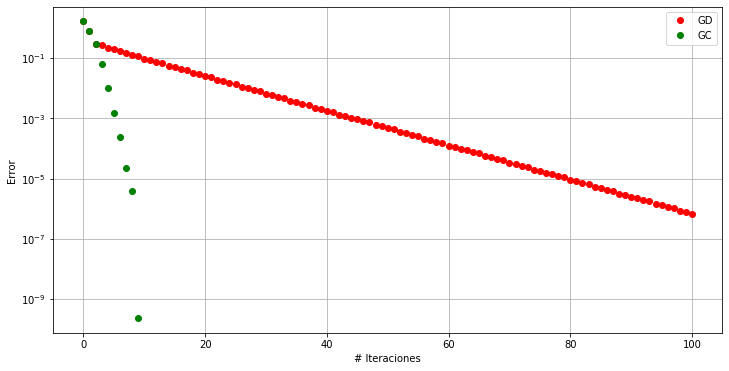

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(error_d.shape[-1]), error_d, 'ro', label="GD")
plt.plot(np.arange(error_c.shape[-1]), error_c, 'go',label="GC")
plt.yscale('log')
plt.xlabel("# Iteraciones")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.show()

Notamos como el *Gradiente Conjugado* obtiene la solución en $n$ pasos a diferencia de *Gradiente Descendente* que requiere más iteraciones.

### Diagrama de contorno

Veamos que realiza el método con un problema en $2D$.

In [14]:
n = 2 
b = np.random.rand(n)
x_0 = np.random.rand(n)
A = dpm(n)
x_exact = np.linalg.solve(A, b)
X_gd_2, R_gd_2 = gradientDescent(A, b, x_0, 100)
X_gc_2, D_gc_2, R_gc_2 = conjugateGradient(A, b, x_0)

In [15]:
print("Solución Exacta", x_exact)
print("GD -> Solución:", X_gd_2[-1], "Error:", np.linalg.norm(x_exact - X_gd_2[-1]), "# Iteraciones:", X_gd_2.shape[0] - 1)
print("GC -> Solución:", X_gc_2[-1], "Error:", np.linalg.norm(x_exact - X_gc_2[-1]), "# Iteraciones:", X_gc_2.shape[0] - 1)

Solución Exacta [0.2796683  0.45752069]
GD -> Solución: [0.2796683  0.45752069] Error: 6.96587714243331e-11 # Iteraciones: 16
GC -> Solución: [0.2796683  0.45752069] Error: 1.1102230246251565e-16 # Iteraciones: 2


In [16]:
# Evaluate Phi(x, y)
N_grid = 20
x_1 = np.linspace(-1, 1, N_grid)
x_2 = np.linspace(-1, 1, N_grid)
X1, X2 = np.meshgrid(x_1, x_2)
Z = np.zeros((N_grid, N_grid))
for i in range(N_grid):
    for j in range(N_grid):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = Phi(x, A, b)

In [17]:
def contoursteps(x1, x2, zs, gd=None, gc=None):
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    # 3D surface plot
    ax.plot_surface(X1, X2, Z, alpha=.65, cmap=plt.cm.viridis)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$\Phi(x,y)$')
    ax.set_title(r"$\Phi(x,y)$")
    # Contour and zoom
    cp = ax2.contourf(x1, x2, zs, alpha=.5)
    ax3.contourf(x1, x2, zs, alpha=.5)
    if gd is not None:
        ax2.plot(gd[:,0], gd[:,1], '-', label="GD")
        ax3.plot(gd[:,0], gd[:,1], '-', label="GD")
    if gc is not None:
        ax2.plot(gc[:,0], gc[:,1], '-', label="GC")
        ax3.plot(gc[:,0], gc[:,1], '-', label="GC")
    ax3.set_xlim(min(np.min(gd[:,0]), np.min(gc[:,0])) - .005, max(np.max(gd[:,0]), np.max(gc[:,0])) + .005)
    ax3.set_ylim(min(np.min(gd[:,1]), np.min(gc[:,1])) - .005, max(np.max(gd[:,1]), np.max(gc[:,1])) + .005)
    ax3.set_title("Zoom")
    ax2.legend()
    ax3.legend()
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$y$")
    ax3.set_xlabel(r"$x$")
    ax3.set_ylabel(r"$y$")
    ax2.set_title("Isocontornos de " + r"$\Phi(x,y)$" +  " + aproximaciones de GD y GC")
    fig.colorbar(cp, ax=ax2)
    plt.tight_layout()
    plt.show()

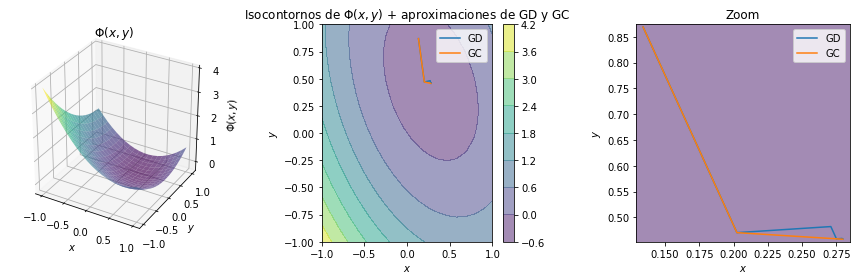

In [18]:
contoursteps(X1, X2, Z, X_gd_2, X_gc_2)

Recordar que al utilizar gradiente descendente, minimizar la función $\Phi(\mathbf{y})=\frac{1}{2}\mathbf{y}^TA\mathbf{y}+\mathbf{y}^T\mathbf{b}$ es análogo a resolver el problema $A\mathbf{x}=\mathbf{b}$.

# Referencia

https://ikuz.eu/machine-learning-and-computer-science/the-concept-of-conjugate-gradient-descent-in-python/